<a href="https://colab.research.google.com/github/TiNkErBeLlTaNyA/Data_Analysis_Test_Project/blob/main/First_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Official Report on Weather trend

### - By Tanya Agarwal


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [ ]:
# uploading two csv files on colab
from google.colab import files
uploaded = files.upload()

Saving city_data.csv to city_data.csv
Saving global_data.csv to global_data.csv


#Extract the given datasets


In [ ]:
#Extracting each file
df_city = pd.read_csv('city_data.csv')
df_global = pd.read_csv('global_data.csv')
print(df_city.shape,df_global.shape)
df_global.sample(2)

(70792, 4) (266, 2)


,year,avg_temp
68,1818,7.83
185,1935,8.52


In [ ]:
df_city.sample(2)

,year,city,country,avg_temp
34493,1932,Lanzhou,China,6.51
12216,1923,Bujumbura,Burundi,20.30


#Merging both the datasets to create 1 dataset
Before that we need to rename the columns for future gliches using rename()

In [ ]:
df_global.rename(columns={'year': 'global_year'}, inplace= True)
df_global.rename(columns={'avg_temp': 'global_avg_temp'}, inplace= True)
df_global.head()

,global_year,global_avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [ ]:
df_city.rename(columns={'avg_temp': 'city_avg_temp'}, inplace= True)
df_city.head()

,year,city,country,city_avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


Now coming to merge the file after renaming the columns

In [ ]:
df_globe = df_city.merge(df_global, left_on='year', right_on='global_year', how='inner')
print(df_globe.shape)
df_globe.sample()

(70239, 6)


,year,city,country,city_avg_temp,global_year,global_avg_temp
48919,1993,Amritsar,India,24.34,1993,8.87


As we have merged the file we need to check whether there is any similar columns which we need to drop for that we can use (.equals)

In [ ]:
df_globe['year'].equals(df_globe['global_year'])

True

As there are 2 similar columns we can just remove them using drop

In [ ]:
df_globee = df_globe.drop(['global_year'], axis=1)
df_globee

,year,city,country,city_avg_temp,global_avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58,7.98
1,1849,Abu Dhabi,United Arab Emirates,26.01,7.98
2,1849,Accra,Ghana,25.70,7.98
3,1849,Adana,Turkey,18.47,7.98
4,1849,Adelaide,Australia,15.19,7.98
...,...,...,...,...,...
70234,1790,Warsaw,Poland,7.67,7.98
70235,1790,Washington,United States,11.79,7.98
70236,1790,Wichita,United States,NaN,7.98
70237,1790,Yerevan,Armenia,NaN,7.98


#Saving file...
As we have merged  datasets, we will save the file to take out a specific data i.e., city

In [ ]:
df_globee.to_csv('globee_dataset.csv', index=False)

#Exploration of given dataset using
- df.sample()
- df.info()
- df.describe()
- df.shape
- df.dtypes

In [ ]:
city = "Agra"
df_agra = df_globee.loc[df_globee['city'] == city]
df_agra.sample(8)

,year,city,country,city_avg_temp,global_avg_temp
59292,1804,Agra,India,25.76,8.84
7557,1872,Agra,India,24.97,8.19
29759,1937,Agra,India,24.85,8.70
52331,2003,Agra,India,25.84,9.53
44123,1979,Agra,India,26.03,8.73
33521,1948,Agra,India,25.49,8.75
31469,1942,Agra,India,25.52,8.73
63182,1829,Agra,India,24.76,7.94


In [ ]:
df_agra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 5 to 66093
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             218 non-null    int64  
 1   city             218 non-null    object 
 2   country          218 non-null    object 
 3   city_avg_temp    206 non-null    float64
 4   global_avg_temp  218 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.2+ KB


In [ ]:
df_agra.shape

(218, 5)

In [ ]:
df_agra.dtypes

year                 int64
city                object
country             object
city_avg_temp      float64
global_avg_temp    float64
dtype: object

#Data Cleaning
- Finding duplicate data
- Finding null values
- Dropping all the null values if any

In [ ]:
sum(df_agra.duplicated())

0

In [ ]:
df_agra.isnull().sum()

year                0
city                0
country             0
city_avg_temp      12
global_avg_temp     0
dtype: int64

In [ ]:
df_agra = df_agra.dropna()

df_agra.isnull().sum()

year               0
city               0
country            0
city_avg_temp      0
global_avg_temp    0
dtype: int64

As our dataset is cleaned and ready for analysis, we can confirm once again if there is any duplocate or null value using info()

In [ ]:
df_agra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 5 to 66093
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             206 non-null    int64  
 1   city             206 non-null    object 
 2   country          206 non-null    object 
 3   city_avg_temp    206 non-null    float64
 4   global_avg_temp  206 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 9.7+ KB


In [ ]:
print(df_agra.nunique())

year               206
city                 1
country              1
city_avg_temp      132
global_avg_temp    125
dtype: int64


#Moving Average
Moving average, i.e. rolling average, is used for calculating averages of window groups indeed having a smoother line to visualize trends better rather than seasonal effects.

In [ ]:
df_agra['city_temp'] = df_agra['city_avg_temp'].rolling(10).mean()
df_agra['global_temp'] = df_agra['global_avg_temp'].rolling(10).mean()
df_agra.head()

,year,city,country,city_avg_temp,global_avg_temp,city_temp,global_temp
5,1849,Agra,India,24.53,7.98,NaN,NaN
301,1850,Agra,India,24.86,7.90,NaN,NaN
608,1851,Agra,India,24.82,8.18,NaN,NaN
915,1852,Agra,India,24.67,8.10,NaN,NaN
1223,1853,Agra,India,24.97,8.04,NaN,NaN


In [ ]:
df_agra = df_agra.dropna()

df_agra.isnull().sum()

year               0
city               0
country            0
city_avg_temp      0
global_avg_temp    0
city_temp          0
global_temp        0
dtype: int64

In [ ]:
df_agra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 5184 to 66093
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             197 non-null    int64  
 1   city             197 non-null    object 
 2   country          197 non-null    object 
 3   city_avg_temp    197 non-null    float64
 4   global_avg_temp  197 non-null    float64
 5   city_temp        197 non-null    float64
 6   global_temp      197 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 12.3+ KB


In [ ]:
df_agra.head()

,year,city,country,city_avg_temp,global_avg_temp,city_temp,global_temp
8574,1875,Agra,India,25.39,7.86,23.632,8.256
8913,1876,Agra,India,25.05,8.08,24.576,8.235
9252,1877,Agra,India,25.30,8.54,25.063,8.245
9591,1878,Agra,India,25.42,8.83,25.114,8.303
9930,1879,Agra,India,24.79,8.17,25.087,8.277


In [ ]:
df_agra.tail()

,year,city,country,city_avg_temp,global_avg_temp,city_temp,global_temp
54383,2009,Agra,India,26.55,9.51,26.066,9.493
54725,2010,Agra,India,26.51,9.70,26.119,9.543
55067,2011,Agra,India,25.53,9.52,26.096,9.554
55409,2012,Agra,India,25.86,9.51,26.016,9.548
55751,2013,Agra,India,26.69,9.61,26.101,9.556


In [ ]:
df_agra = df_agra.query('year > 1874')
df_agra

,year,city,country,city_avg_temp,global_avg_temp,city_temp,global_temp
8574,1875,Agra,India,25.39,7.86,23.632,8.256
8913,1876,Agra,India,25.05,8.08,24.576,8.235
9252,1877,Agra,India,25.30,8.54,25.063,8.245
9591,1878,Agra,India,25.42,8.83,25.114,8.303
9930,1879,Agra,India,24.79,8.17,25.087,8.277
...,...,...,...,...,...,...,...
54383,2009,Agra,India,26.55,9.51,26.066,9.493
54725,2010,Agra,India,26.51,9.70,26.119,9.543
55067,2011,Agra,India,25.53,9.52,26.096,9.554
55409,2012,Agra,India,25.86,9.51,26.016,9.548


# Visualization  
Trying to check temperature of a city(s) and global
By ploting charts
- Line Chart
- Area Chart
- Histogram Chart

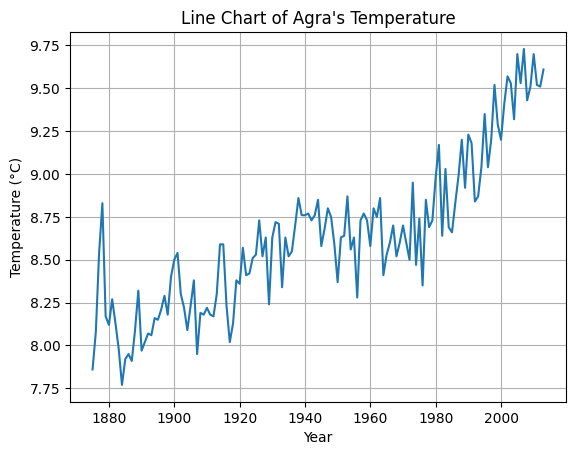

In [ ]:
plt.plot(df_agra['year'], df_agra['global_avg_temp'], label='Agra')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title("Line Chart of Agra's Temperature")
plt.grid()

From the above graph we can not determine the temperature year wise, as it is very deficult to read from it.

In [ ]:
df_agra.describe()

,year,city_avg_temp,global_avg_temp,city_temp,global_temp
count,139.000000,139.000000,139.000000,139.000000,139.000000
mean,1944.000000,25.406547,8.636906,25.356036,8.595705
std,40.269923,0.493123,0.447672,0.334678,0.380807
min,1875.000000,23.900000,7.770000,23.632000,8.000000
25%,1909.500000,25.035000,8.295000,25.147000,8.278500
50%,1944.000000,25.400000,8.600000,25.358000,8.613000
75%,1978.500000,25.725000,8.845000,25.518500,8.743500
max,2013.000000,26.690000,9.730000,26.119000,9.556000


So to solve the issue we use moving average i.e., rolling average that are city_temp and global_temp.

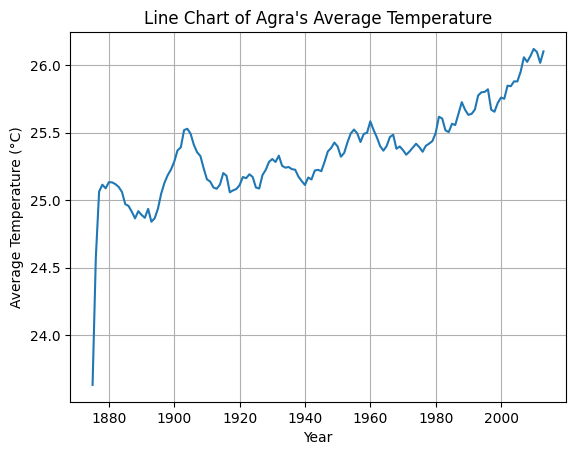

In [ ]:
plt.plot(df_agra['year'], df_agra['city_temp'], label='Agra')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title("Line Chart of Agra's Average Temperature")
plt.grid()


The above chart clearly shows Agra's temperature is increasing yearly from 1875 to 2013 from the given data which states temperature would increase after 2013 as well.

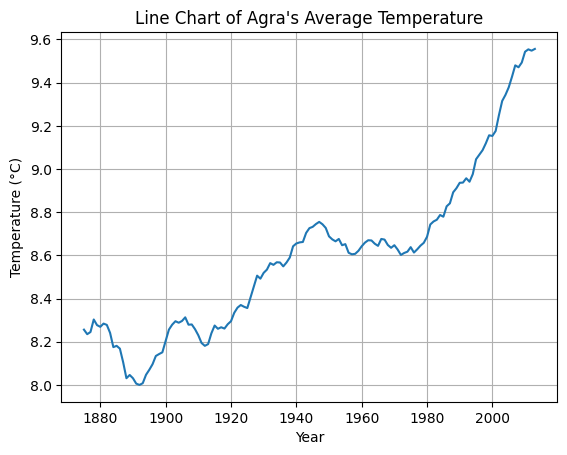

In [ ]:
plt.plot(df_agra['year'], df_agra['global_temp'], label='Agra')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title("Line Chart of Agra's Average Temperature")
plt.grid()

And the Global temperature has increased gradually from 1978 to 2013.


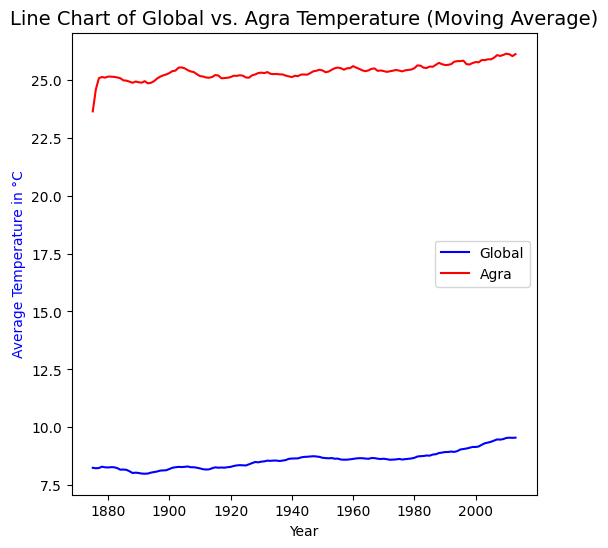

In [ ]:
fig, ax = plt.subplots(figsize=[6,6])
ax.plot(df_agra.year, df_agra.global_temp, label='Global', color='blue')
ax.plot(df_agra.year, df_agra.city_temp, label='Agra', color='red')
ax.set_xlabel('Year')
ax.set_ylabel('Average Temperature in °C', color='blue')
ax.legend()
ax.set_title("Line Chart of Global vs. Agra Temperature (Moving Average)", size=14)
plt.show()

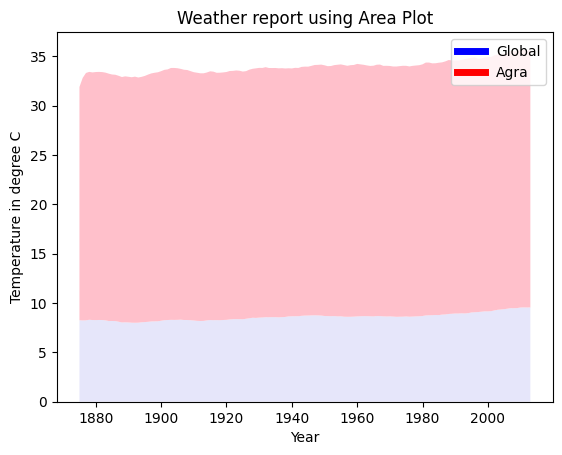

In [ ]:
plt.plot([],[], color='Blue', label = 'Global', linewidth=5)
plt.plot([],[],color = 'Red', label='Agra', linewidth=5)
plt.stackplot(df_agra['year'], df_agra['global_temp'], df_agra['city_temp'] , colors = ['Lavender', 'Pink'])
plt.xlabel('Year')
plt.ylabel('Temperature in degree C')
plt.title('Weather report using Area Plot')
plt.legend()
plt.show()

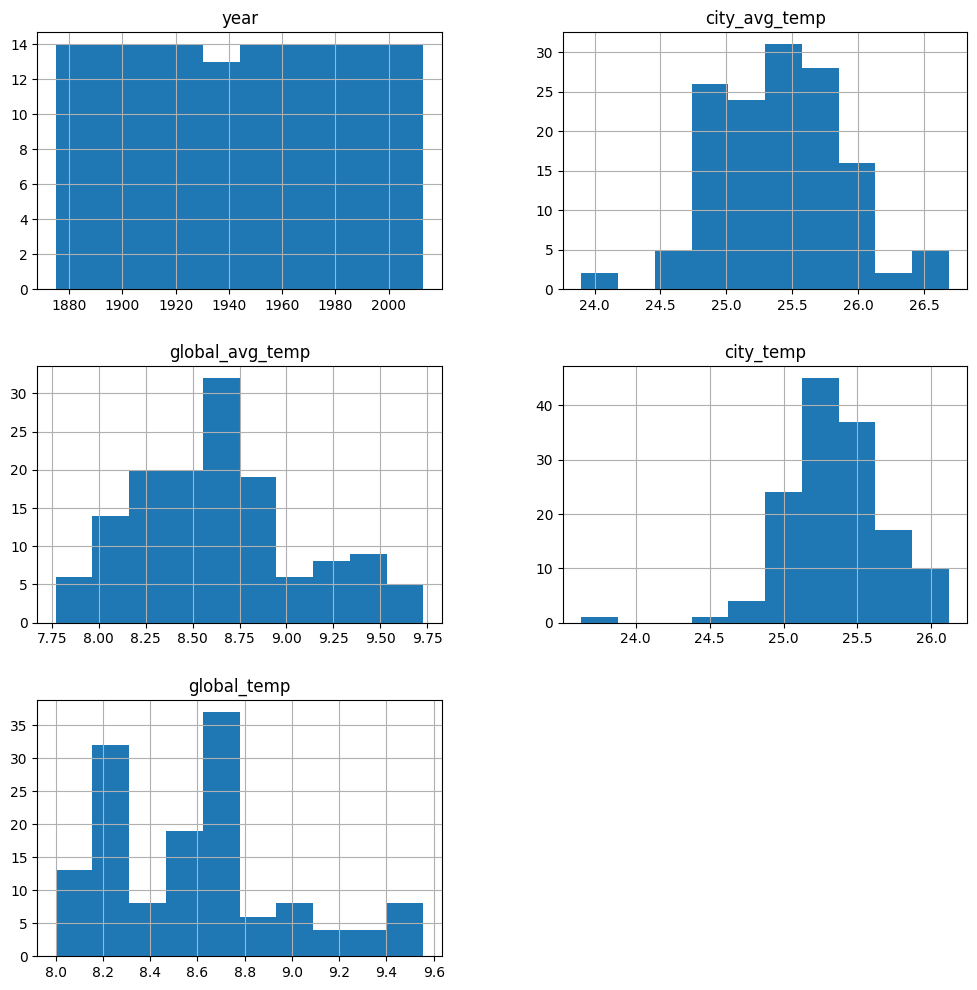

In [ ]:
df_agra.hist(figsize = (12,12));

###Exploring a new city from the merged file to show temperature variation in 2 cities or countries

In [ ]:
city = "Bangalore"
df_blr = df_globee.loc[df_globee['city'] == city]
df_blr.sample(8)

,year,city,country,city_avg_temp,global_avg_temp
58513,1798,Bangalore,India,24.65,8.67
33887,1949,Bangalore,India,24.92,8.59
6564,1869,Bangalore,India,24.92,8.43
2842,1858,Bangalore,India,24.59,8.10
14735,1893,Bangalore,India,24.38,8.06
39701,1966,Bangalore,India,25.32,8.60
24653,1922,Bangalore,India,24.74,8.41
9276,1877,Bangalore,India,25.23,8.54


In [ ]:
df_blr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 28 to 66115
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             218 non-null    int64  
 1   city             218 non-null    object 
 2   country          218 non-null    object 
 3   city_avg_temp    211 non-null    float64
 4   global_avg_temp  218 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.2+ KB


In [ ]:
df_blr['city_temp'] = df_blr['city_avg_temp'].rolling(10).mean();
df_blr['global_temp'] = df_blr['global_avg_temp'].rolling(10).mean();
df_blr.head()

,year,city,country,city_avg_temp,global_avg_temp,city_temp,global_temp
2842,1858,Bangalore,India,24.59,8.10,NaN,NaN
3178,1859,Bangalore,India,24.55,8.25,NaN,NaN
3516,1860,Bangalore,India,24.41,7.96,NaN,NaN
3854,1861,Bangalore,India,24.21,7.85,NaN,NaN
4192,1862,Bangalore,India,23.59,7.56,NaN,NaN


In [ ]:
df_blr = df_blr.dropna()

df_blr.isnull().sum()

year               0
city               0
country            0
city_avg_temp      0
global_avg_temp    0
city_temp          0
global_temp        0
dtype: int64

In [ ]:
df_blr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 2842 to 66115
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             184 non-null    int64  
 1   city             184 non-null    object 
 2   country          184 non-null    object 
 3   city_avg_temp    184 non-null    float64
 4   global_avg_temp  184 non-null    float64
 5   city_temp        184 non-null    float64
 6   global_temp      184 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 11.5+ KB


In [ ]:
df_blr.tail()

,year,city,country,city_avg_temp,global_avg_temp,city_temp,global_temp
56378,1844,Bangalore,India,24.23,7.65,25.390,9.236
56644,1845,Bangalore,India,24.46,7.85,25.294,9.068
56915,1846,Bangalore,India,24.90,8.55,25.238,8.950
57186,1847,Bangalore,India,24.35,8.09,25.138,8.816
57458,1848,Bangalore,India,24.35,7.98,25.000,8.663


In [ ]:
df_blr = df_blr.query('year > 1848')
df_blr

,year,city,country,city_avg_temp,global_avg_temp,city_temp,global_temp
2842,1858,Bangalore,India,24.59,8.10,24.440,8.038
3178,1859,Bangalore,India,24.55,8.25,24.463,8.065
3516,1860,Bangalore,India,24.41,7.96,24.466,8.071
3854,1861,Bangalore,India,24.21,7.85,24.442,8.038
4192,1862,Bangalore,India,23.59,7.56,24.358,7.984
...,...,...,...,...,...,...,...
54407,2009,Bangalore,India,25.73,9.51,25.524,9.493
54749,2010,Bangalore,India,25.71,9.70,25.561,9.543
55091,2011,Bangalore,India,25.36,9.52,25.544,9.554
55433,2012,Bangalore,India,26.04,9.51,25.572,9.548


In [ ]:
df_blr.describe()

,year,city_avg_temp,global_avg_temp,city_temp,global_temp
count,154.000000,154.000000,154.000000,154.000000,154.000000
mean,1936.435065,25.006299,8.591753,24.964286,8.546403
std,44.710532,0.404716,0.452741,0.302868,0.392563
min,1858.000000,23.590000,7.560000,24.358000,7.984000
25%,1898.250000,24.742500,8.232500,24.763000,8.247750
50%,1936.500000,25.000000,8.575000,24.946000,8.567500
75%,1974.750000,25.230000,8.800000,25.083750,8.720500
max,2013.000000,26.610000,9.730000,25.641000,9.556000


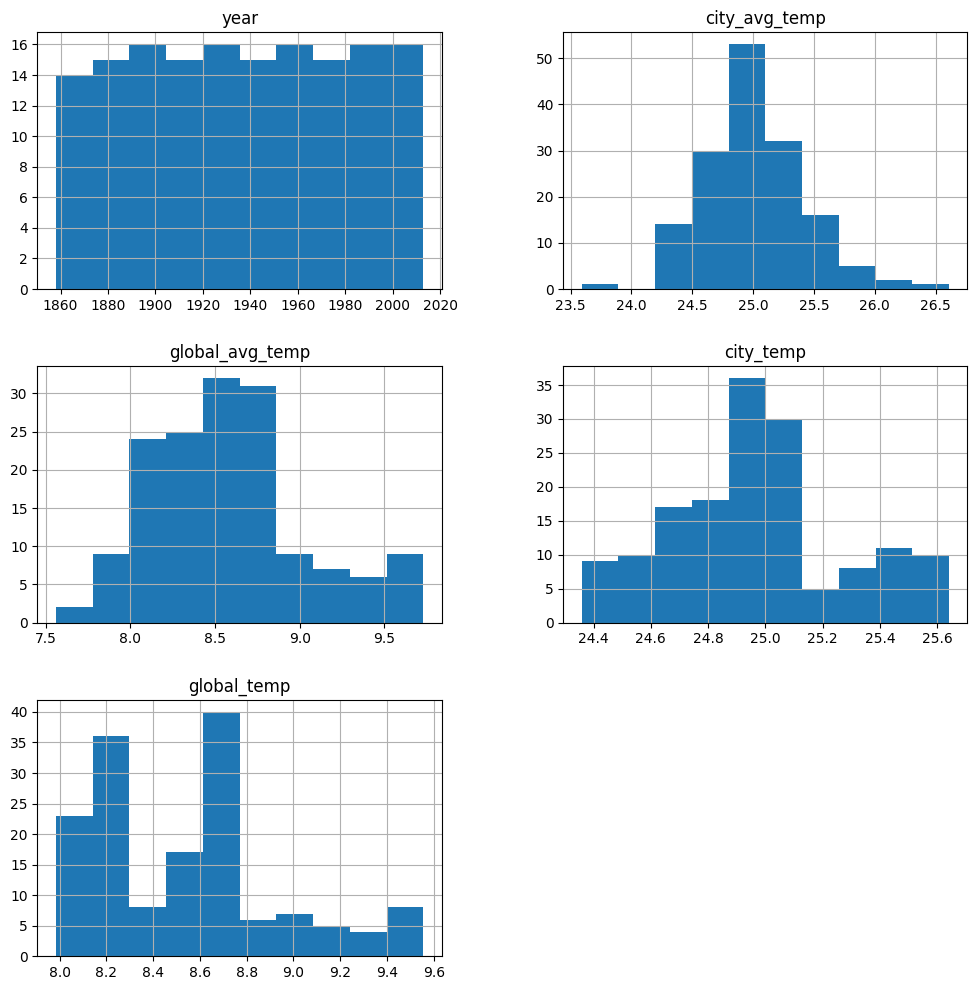

In [ ]:
df_blr.hist(figsize = (12,12));

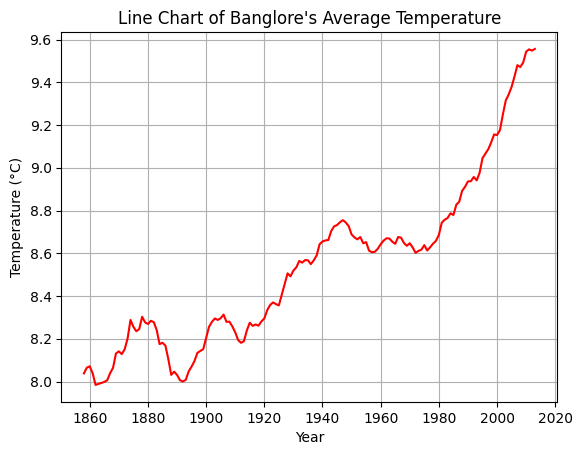

In [ ]:
#plt.plot(df_blr['year'], df_blr['global_temp'], label='Global',color='Blue')
plt.plot(df_blr['year'], df_blr['global_temp'], label='Banglore',color='Red')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title("Line Chart of Banglore's Average Temperature")
plt.grid(True)

#Observation
## Determining both the cities moving temperature with each other to see which city's temperature has increased overtime.

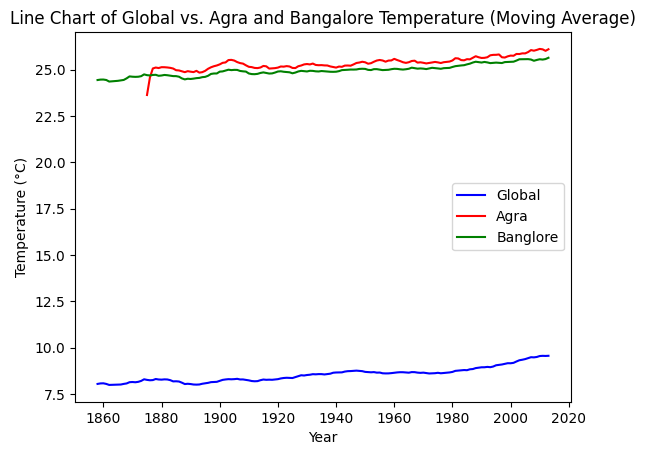

In [ ]:
#plt.plot(df_agra['year'], df_agra['global_temp'], label='Global', color='blue')
plt.plot(df_blr['year'], df_blr['global_temp'], label='Global', color='blue')
plt.plot(df_agra['year'], df_agra['city_temp'], label='Agra', color='red')
plt.plot(df_blr['year'], df_blr['city_temp'], label='Banglore', color='green')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Line Chart of Global vs. Agra and Bangalore Temperature (Moving Average)')
plt.legend()
plt.show()

#CONCLUSION
- First we had determined both Global and Agra's Temperature that has increased yearly but still difference can be seen in temperature rating that city temperature is above 26°C and global temperature is about 9.75°C from above line chart.
- Agra's temperature mean is 25.3°C from year 1875 to 2013 (the readings show that temperature has never come down from 1875 but has only increased over time due to and
-  Bangalore's temperature mean is 24.9°C from year 1858 to 2013.
- From the observation  we can clearly see that bangalore has never touched Agra's temperature in this dataset i.e., Agra is much hotter then Bangalore during summer season.